## 1. Data Loading and Basic Exploration

In [4]:
import pandas as pd

df = pd.read_csv('/Users/lasya/Downloads/Crime_Data_from_2020_to_Present-2.csv') #loading csv

df.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [5]:
# Structure of the dataset
df.shape

(986500, 28)

In [6]:
# Display the column names
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [7]:
# Looking at the dataset, DR_NO could be a potential unique identifier 

potential_unique_identifier = 'DR_NO'
is_unique = df[potential_unique_identifier].is_unique

print(f"Is '{potential_unique_identifier}' a unique identifier? {is_unique}")

Is 'DR_NO' a unique identifier? True


In [8]:
# Data types 
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [9]:
# Checking if there are any null values 
df.isnull().sum().sum()

5468915

In [10]:
# Check missing values per column
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Display only columns with missing values

Mocodes           146435
Vict Sex          139575
Vict Descent      139586
Premis Cd             14
Premis Desc          585
Weapon Used Cd    660132
Weapon Desc       660132
Status                 1
Crm Cd 1              11
Crm Cd 2          917588
Crm Cd 3          984190
Crm Cd 4          986436
Cross Street      834230
dtype: int64


In [11]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

In [12]:
# Display only columns with missing values and their percentages
missing_percentage = missing_percentage[missing_percentage > 0]
print(missing_percentage)

Mocodes           14.843893
Vict Sex          14.148505
Vict Descent      14.149620
Premis Cd          0.001419
Premis Desc        0.059301
Weapon Used Cd    66.916574
Weapon Desc       66.916574
Status             0.000101
Crm Cd 1           0.001115
Crm Cd 2          93.014496
Crm Cd 3          99.765839
Crm Cd 4          99.993512
Cross Street      84.564622
dtype: float64


In [13]:
# Dropping columns with very high missing percentages 
# because columns with over 80% missing provided only limited value for analysis.


# We could either fill or drop, but filling here in our case would potentially reduce accuracy and quality of analysis

# Hence we drop columns with high missing percentages

# Set a threshold and remove columns with missing values above that threshold

threshold = 80

# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Identify columns to drop - those with missing percentage above the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# Now drop the identified columns
df = df.drop(columns=columns_to_drop)


In [14]:
# Print the columns that are dropped
print("Columns dropped:", columns_to_drop)

Columns dropped: Index(['Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street'], dtype='object')


In [15]:
# Print the remaining columns 

print("Remaining columns:", df.columns)

Remaining columns: Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'LOCATION', 'LAT', 'LON'],
      dtype='object')


In [16]:
# Recalculate the percentage of missing values after dropping high-missing columns
remaining_missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display only columns with missing values
remaining_missing_percentage = remaining_missing_percentage[remaining_missing_percentage > 0]
print("Remaining columns with missing values and their percentages:")
print(remaining_missing_percentage)

Remaining columns with missing values and their percentages:
Mocodes           14.843893
Vict Sex          14.148505
Vict Descent      14.149620
Premis Cd          0.001419
Premis Desc        0.059301
Weapon Used Cd    66.916574
Weapon Desc       66.916574
Status             0.000101
Crm Cd 1           0.001115
dtype: float64


In [17]:
# Remaining Columns with High Missing Value Percentage (~67%): Weapon Used Cd & Weapon Desc
# Since we are only focusing on Time Series Trends and Severity Analysis, these columns are of little value to our analysis.
# Hence we drop these columns to maintain data quality 


# Drop Weapon Used Cd and Weapon Desc columns
df = df.drop(columns=['Weapon Used Cd', 'Weapon Desc'])

# Verify the columns have been dropped
print("Remaining columns:", df.columns)

Remaining columns: Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Status', 'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT', 'LON'],
      dtype='object')


In [18]:
# Filling Moderate Missing Values (~14%): Mocodes, Vict Sex, Vict Descent
# Since these columns are categorical and not numerical, we can fill these columns with mode (most common value)

# Fill moderate missing columns with the mode 
for column in ['Mocodes', 'Vict Sex', 'Vict Descent']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [19]:
# Display a random sample of rows to verify
df[['Mocodes', 'Vict Sex', 'Vict Descent']].sample(10)

,Mocodes,Vict Sex,Vict Descent
547250,1822 0358 1402 0325 1601,X,X
331121,1258 0416 0602 0553,M,H
471509,1822 0104 0325,M,W
951099,1822 0910 2052 1501,X,X
629294,0443 1822 1218 0906 2004,F,B
185912,0416 0447 0342 0327 1309,M,H
209966,0344 0913 2004,F,H
430443,0344 0397,F,B
719189,1300 0344,F,H
422415,0416,M,W


In [20]:
# Verify if the nulls values are filled

print(df[['Mocodes', 'Vict Sex', 'Vict Descent']].isnull().sum()) 

Mocodes         0
Vict Sex        0
Vict Descent    0
dtype: int64


In [21]:
# Drop rows that have really low missing values (~1%): 'Premis Cd', 'Premis Desc', 'Status', 'Crm Cd 1'
# This has minimal impact on the dataset overall

# Drop rows with low missing columns
df = df.dropna(subset=['Premis Cd', 'Premis Desc', 'Status', 'Crm Cd 1'])

# Verify that there are no missing values left in these columns
print(df[['Premis Cd', 'Premis Desc', 'Status', 'Crm Cd 1']].isnull().sum())

Premis Cd      0
Premis Desc    0
Status         0
Crm Cd 1       0
dtype: int64


In [22]:
# Check for any remaining null values in the entire DataFrame

null_count = df.isnull().sum()
print("Columns with remaining null values:")
print(null_count[null_count > 0])

Columns with remaining null values:
Series([], dtype: int64)


## 2. Data Cleaning and Transformation 

In [23]:
# Print each column name with its index for inspection
for i, col in enumerate(df.columns):
    print(f"{i}: '{col}'")

0: 'DR_NO'
1: 'Date Rptd'
2: 'DATE OCC'
3: 'TIME OCC'
4: 'AREA'
5: 'AREA NAME'
6: 'Rpt Dist No'
7: 'Part 1-2'
8: 'Crm Cd'
9: 'Crm Cd Desc'
10: 'Mocodes'
11: 'Vict Age'
12: 'Vict Sex'
13: 'Vict Descent'
14: 'Premis Cd'
15: 'Premis Desc'
16: 'Status'
17: 'Status Desc'
18: 'Crm Cd 1'
19: 'LOCATION'
20: 'LAT'
21: 'LON'


In [24]:
df.dtypes

DR_NO             int64
Date Rptd        object
DATE OCC         object
TIME OCC          int64
AREA              int64
AREA NAME        object
Rpt Dist No       int64
Part 1-2          int64
Crm Cd            int64
Crm Cd Desc      object
Mocodes          object
Vict Age          int64
Vict Sex         object
Vict Descent     object
Premis Cd       float64
Premis Desc      object
Status           object
Status Desc      object
Crm Cd 1        float64
LOCATION         object
LAT             float64
LON             float64
dtype: object

In [25]:
# Create a temporary list of transformed column names
temp_columns = df.columns.str.strip().str.lower().str.replace(r'\s+', '_', regex=True)

# Display the transformed column names to confirm the format
print("Transformed column names:", temp_columns)

Transformed column names: Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'part_1-2', 'crm_cd', 'crm_cd_desc', 'mocodes',
       'vict_age', 'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc',
       'status', 'status_desc', 'crm_cd_1', 'location', 'lat', 'lon'],
      dtype='object')


In [26]:
# Apply the transformed column names to the DataFrame
df.columns = temp_columns

# Verify the updated column names in df
print("Updated DataFrame column names:", df.columns)

Updated DataFrame column names: Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'part_1-2', 'crm_cd', 'crm_cd_desc', 'mocodes',
       'vict_age', 'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc',
       'status', 'status_desc', 'crm_cd_1', 'location', 'lat', 'lon'],
      dtype='object')


In [27]:
# Extract Date and Time Components: extract the year, month, day, and hour into new columns.

# Convert both 'date_occ' and 'date_rptd' to datetime format 
df['date_occ'] = pd.to_datetime(df['date_occ'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['date_rptd'] = pd.to_datetime(df['date_rptd'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')


In [28]:
print(df[['date_occ', 'date_rptd']].head(10))

    date_occ  date_rptd
0 2020-03-01 2020-03-01
1 2020-02-08 2020-02-09
2 2020-11-04 2020-11-11
3 2020-03-10 2023-05-10
4 2020-08-17 2022-08-18
5 2020-12-01 2023-04-04
6 2020-07-03 2023-04-04
7 2020-05-12 2022-07-22
8 2020-12-09 2023-04-28
9 2020-12-31 2020-12-31


In [29]:
#df_original = pd.read_csv('/Users/lasya/Downloads/Crime_Data_from_2020_to_Present-2.csv')
#print("Column names in the original data:", df_original.columns)

In [30]:
# print(df_original[['DATE OCC', 'Date Rptd']])

In [31]:
# Extract year, month, and day for both date columns
df['occ_year'] = df['date_occ'].dt.year
df['occ_month'] = df['date_occ'].dt.month
df['occ_day'] = df['date_occ'].dt.day

df['rpt_year'] = df['date_rptd'].dt.year
df['rpt_month'] = df['date_rptd'].dt.month
df['rpt_day'] = df['date_rptd'].dt.day
df['occ_hr'] = pd.to_datetime(df['time_occ'].astype(str).str.zfill(4), format='%H%M').dt.hour



In [32]:
# Display the first few rows to verify the new columns
df[['date_occ', 'occ_year', 'occ_month', 'occ_day', 'date_rptd', 'rpt_year', 'rpt_month', 'rpt_day', 
    'time_occ', 'occ_hr']].head()

,date_occ,occ_year,occ_month,occ_day,date_rptd,rpt_year,rpt_month,rpt_day,time_occ,occ_hr
0,2020-03-01,2020,3,1,2020-03-01,2020,3,1,2130,21
1,2020-02-08,2020,2,8,2020-02-09,2020,2,9,1800,18
2,2020-11-04,2020,11,4,2020-11-11,2020,11,11,1700,17
3,2020-03-10,2020,3,10,2023-05-10,2023,5,10,2037,20
4,2020-08-17,2020,8,17,2022-08-18,2022,8,18,1200,12


In [33]:
# Extracting hour 
#df['occ_hour'] = df['date_occ'].dt.hour
#df['rpt_hour'] = df['date_rptd'].dt.hour

#df[['date_occ', 'occ_year', 'occ_month', 'occ_day', 'occ_hour', 'date_rptd', 
#    'rpt_year', 'rpt_month', 'rpt_day', 'rpt_hour']].head()

In [34]:
df.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,...,location,lat,lon,occ_year,occ_month,occ_day,rpt_year,rpt_month,rpt_day,occ_hr
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,1900 S LONGWOOD AV,34.0375,-118.3506,2020,3,1,2020,3,1,21
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,1000 S FLOWER ST,34.0444,-118.2628,2020,2,8,2020,2,9,18
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,1400 W 37TH ST,34.0210,-118.3002,2020,11,4,2020,11,11,17
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,14000 RIVERSIDE DR,34.1576,-118.4387,2020,3,10,2023,5,10,20
4,220614831,2022-08-18,2020-08-17,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,1900 TRANSIENT,34.0944,-118.3277,2020,8,17,2022,8,18,12


In [35]:
#print(df[['date_occ', 'date_rptd']].head(10))

In [36]:
#df = df.drop(columns=['occ_hour', 'rpt_hour'])

#print(df.columns)

In [37]:
# Add Derived Columns: Create relevant columns 

# Create is_weekend column 

# True if Saturday or Sunday, False if others

df['is_weekend'] = df['date_occ'].dt.dayofweek >= 5

print(df[['date_occ', 'is_weekend']].head(10))

    date_occ  is_weekend
0 2020-03-01        True
1 2020-02-08        True
2 2020-11-04       False
3 2020-03-10       False
4 2020-08-17       False
5 2020-12-01       False
6 2020-07-03       False
7 2020-05-12       False
8 2020-12-09       False
9 2020-12-31       False


In [38]:
# Create day_of_week column which will allow us to analyze crime patterns across specific days 
# This column will extract the weekday name from date_occ

df['day_of_week'] = df['date_occ'].dt.day_name()

print(df[['date_occ', 'day_of_week']].head(10))

    date_occ day_of_week
0 2020-03-01      Sunday
1 2020-02-08    Saturday
2 2020-11-04   Wednesday
3 2020-03-10     Tuesday
4 2020-08-17      Monday
5 2020-12-01     Tuesday
6 2020-07-03      Friday
7 2020-05-12     Tuesday
8 2020-12-09   Wednesday
9 2020-12-31    Thursday


In [ ]:
# Lets explore crime desc to understand the categories of crimes present 


unique_crime_desc= df['crm_cd_desc'].unique()
print(unique_crime_desc)


In [40]:
# Creating a Crime Severity Column 
# This will categorize crimes into High, Medium and Low 

# Define severity categorization based on keywords
def categorize_severity(crime_desc):
    crime_desc = crime_desc.upper()  # Ensure case insensitivity
    if any(word in crime_desc for word in ["HOMICIDE", "ASSAULT", "KIDNAPPING", "RAPE", "EXTORTION", "ROBBERY", "BATTERY", "WEAPON", "ARSON"]):
        return 'High'
    elif any(word in crime_desc for word in ["THEFT", "BURGLARY", "FRAUD", "VANDALISM", "SHOPLIFTING", "EMBEZZLEMENT", "STOLEN"]):
        return 'Medium'
    elif any(word in crime_desc for word in ["TRESPASSING", "DISRUPT", "DISTURBING", "RECKLESS", "DRUNK", "PETTY"]):
        return 'Low'
    else:
        return 'Low'  # Default to 'Low' if none of the keywords match

# Apply function to create 'crime_severity' column
df['crime_severity'] = df['crm_cd_desc'].apply(categorize_severity)

# Verify the addition of the new column
print(df[['crm_cd_desc', 'crime_severity']].head(10))

                                crm_cd_desc crime_severity
0                          VEHICLE - STOLEN         Medium
1                     BURGLARY FROM VEHICLE         Medium
2                             BIKE - STOLEN         Medium
3  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)         Medium
4                         THEFT OF IDENTITY         Medium
5                         THEFT OF IDENTITY         Medium
6                         THEFT OF IDENTITY         Medium
7                         THEFT OF IDENTITY         Medium
8                         THEFT OF IDENTITY         Medium
9                  BATTERY - SIMPLE ASSAULT           High


In [ ]:
# Display the next few rows to verify categorization
df[['crm_cd_desc', 'crime_severity']].head(20)

In [ ]:
# Define severity categorization based on keywords
def categorize_severity(crime_desc):
    crime_desc = crime_desc.upper()  
    if any(word in crime_desc for word in ["HOMICIDE", "ASSAULT", "KIDNAPPING", "RAPE",
                                           "EXTORTION", "ROBBERY", "BATTERY", "WEAPON", "ARSON",
                                           "SEXUAL", "SODOMY", "MINOR", "CRM", "CRIME",
                                           "AGNST CHLD"]):
        return 'High'
    elif any(word in crime_desc for word in ["THEFT", "BURGLARY", "FRAUD", "VANDALISM", "SHOPLIFTING", 
                                             "EMBEZZLEMENT", "STOLEN", "ANNOYING"]):
        return 'Medium'
    elif any(word in crime_desc for word in ["TRESPASSING", "DISRUPT", "DISTURBING", "RECKLESS", 
                                             "DRUNK", "PETTY"]):
        return 'Low'
    else:
        return 'Unknown'  # Default to 'Unknown' if none of the keywords match

# Apply function to create 'crime_severity' column
df['crime_severity'] = df['crm_cd_desc'].apply(categorize_severity)

# Verify the addition of the new column
print(df[['crm_cd_desc', 'crime_severity']].head(50))

In [43]:
# Ensuring 'lat' and 'lon' do not have any missing values
missing_location = df[['lat', 'lon']].isnull().sum()
print("Missing values in location data:\n", missing_location)

Missing values in location data:
 lat    0
lon    0
dtype: int64


## 3. Data Enrichment with External Data 

In [44]:
# Loading the external dataset

colls_df = pd.read_csv('/Users/lasya/Downloads/Motor_Vehicle_Collisions_-_Crashes.csv')

colls_df.head()

/var/folders/lf/v01d8y2j1sd5kxsgsf9zrsgc0000gn/T/ipykernel_2951/3651273110.py:3: DtypeWarning: Columns (3,22,28) have mixed types. Specify dtype option on import or set low_memory=False.
  colls_df = pd.read_csv('/Users/lasya/Downloads/Motor_Vehicle_Collisions_-_Crashes.csv')


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [ ]:
colls_df.info()

In [46]:
colls_df['CRASH DATE'] = pd.to_datetime(colls_df['CRASH DATE'], errors = 'coerce')

In [47]:
print(f"Crime dataset size: {df.shape}")
print(f"Collisions dataset size: {colls_df.shape}")

Crime dataset size: (985904, 32)
Collisions dataset size: (2130063, 29)


In [ ]:
# Sort both DataFrames by their date columns
df = df.sort_values('date_occ')
colls_df = colls_df.sort_values('CRASH DATE')

# Merge datasets using pd.merge_asof
merged_data = pd.merge_asof(
    df,
    colls_df,
    left_on='date_occ',
    right_on='CRASH DATE',
    direction='nearest'
)

# Display the first few rows of the merged dataset
print(merged_data.head())


## 4. ETL Pipeline Simulation

In [49]:
# Check for NaN values in the merged dataset
nan_summary = merged_data.isnull().sum()
print("NaN values in the merged dataset:\n", nan_summary[nan_summary > 0])

NaN values in the merged dataset:
 BOROUGH                          341064
ZIP CODE                         341064
LATITUDE                          92104
LONGITUDE                         92104
LOCATION                          92104
ON STREET NAME                   253647
CROSS STREET NAME                508952
OFF STREET NAME                  732257
CONTRIBUTING FACTOR VEHICLE 1      8543
CONTRIBUTING FACTOR VEHICLE 2    225480
CONTRIBUTING FACTOR VEHICLE 3    901864
CONTRIBUTING FACTOR VEHICLE 4    969556
CONTRIBUTING FACTOR VEHICLE 5    982677
VEHICLE TYPE CODE 1               16585
VEHICLE TYPE CODE 2              319878
VEHICLE TYPE CODE 3              905548
VEHICLE TYPE CODE 4              969687
VEHICLE TYPE CODE 5              982677
dtype: int64


In [50]:
# Create a temporary list of transformed column names
temp_colls_columns = colls_df.columns.str.strip().str.lower().str.replace(r'\s+', '_', regex=True)

# Display the transformed column names to confirm the format
print("Transformed column names:", temp_colls_columns)

Transformed column names: Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'on_street_name', 'cross_street_name',
       'off_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'collision_id', 'vehicle_type_code_1', 'vehicle_type_code_2',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5'],
      dtype='object')


In [51]:
# Apply the transformed column names to the DataFrame
colls_df.columns = temp_colls_columns

# Verify the updated column names in df
print("Updated DataFrame column names:", colls_df.columns)

Updated DataFrame column names: Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'on_street_name', 'cross_street_name',
       'off_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'collision_id', 'vehicle_type_code_1', 'vehicle_type_code_2',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5'],
      dtype='object')


In [52]:
# Load: Export the transformed and enriched dataset
merged_data.to_csv('transformed_crime_data.csv', index=False)

## 5. Data Aggregation and Analysis

In [ ]:
# Time Series Analysis: Use the time components to analyze trends in crime rates (e.g., trends by month or hour).

monthly_trends = merged_data.groupby('occ_month').size()
hourly_trends = merged_data.groupby('occ_hr').size()

# Print the trends
print("Monthly Trends:\n", monthly_trends)
print("Hourly Trends:\n", hourly_trends)

In [54]:
# Hotspot Analysis: Identify the top 5 crime hotspots using location data and visualize these hotspots on a map, if latitude and longitude information is available.

# Group by latitude and longitude to count the number of incidents
hotspot_data = merged_data.groupby(['lat', 'lon']).size().reset_index(name='incident_count')

# Display the top hotspots
top_hotspots = hotspot_data.sort_values(by='incident_count', ascending=False).head(10)  # Get top 10 hotspots
print("Top Hotspots:\n", top_hotspots)

Top Hotspots:
            lat       lon  incident_count
33594  34.0561 -118.2375            2355
0       0.0000    0.0000            2262
30759  34.0483 -118.2631            1752
68711  34.2440 -118.5583            1473
28609  34.0428 -118.4582            1382
37940  34.0736 -118.3563            1273
34968  34.0611 -118.4184            1261
34554  34.0595 -118.2749            1233
43413  34.1016 -118.3387            1225
30640  34.0480 -118.2577            1125


In [55]:
# Severity Analysis: If the dataset includes a severity or category column, analyze the most common categories and identify if any are more likely to occur at specific times of day or in certain areas.

# Count occurrences of each severity level
severity_counts = merged_data['crime_severity'].value_counts()

# Display the counts
print("Severity Counts:\n", severity_counts)

Severity Counts:
 Medium     615336
High       296399
Unknown     54160
Low         20009
Name: crime_severity, dtype: int64


In [ ]:
# Group by hour and severity to count occurrences
hourly_severity = merged_data.groupby(['occ_hr', 'crime_severity']).size().unstack(fill_value=0)

# Display the hourly severity analysis
print("Hourly Severity Analysis:\n", hourly_severity)


In [ ]:
# Group by area and severity to count occurrences
area_severity = merged_data.groupby(['area_name', 'crime_severity']).size().unstack(fill_value=0)

# Display the area severity analysis
print("Area Severity Analysis:\n", area_severity)

## 6. Visualization 

In [ ]:
!pip install folium

In [59]:
# Crime by Day of the Week and Hour: Create a heatmap showing the distribution of crimes by the day of the week and the hour of the day.

import seaborn as sns
import matplotlib.pyplot as plt

# Define the correct order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'day' column to a categorical type with the specified order
merged_data['day_of_week'] = pd.Categorical(merged_data['day_of_week'], categories=day_order, ordered=True)

# Create the pivot table again
heatmap_data = merged_data.groupby(['day_of_week', 'occ_hr']).size().unstack(fill_value=0)

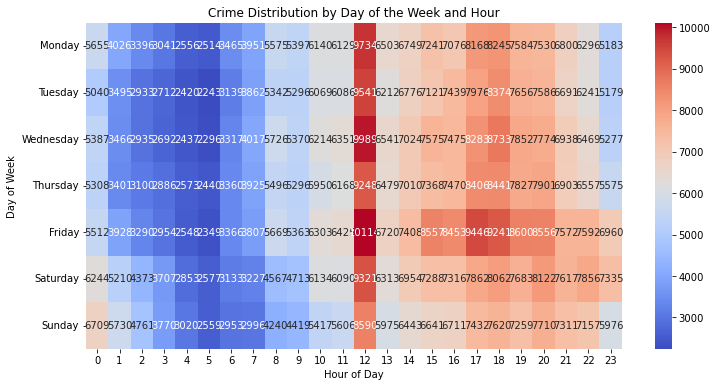

In [60]:
# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d')
plt.title('Crime Distribution by Day of the Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


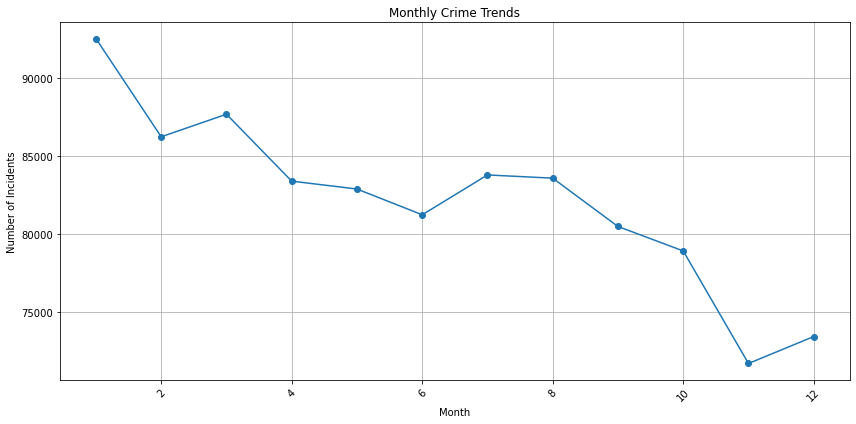

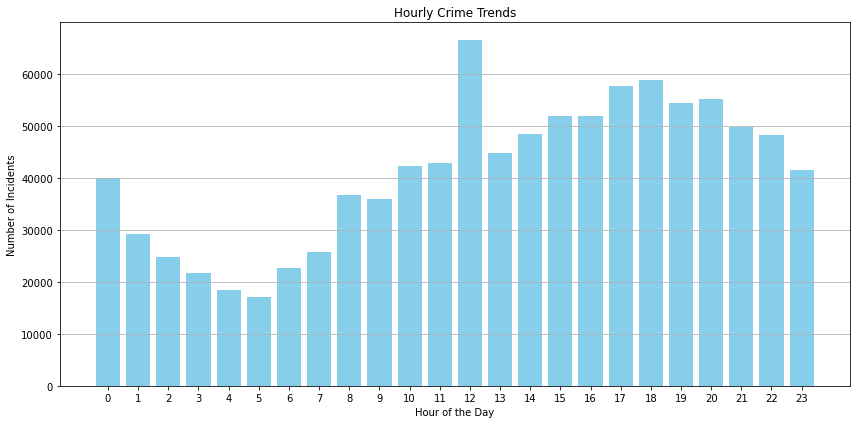

In [62]:
import matplotlib.pyplot as plt

# Visualizing Monthly Trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends.index, monthly_trends.values, marker='o')
plt.title('Monthly Crime Trends')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Visualizing Hourly Trends
plt.figure(figsize=(12, 6))
plt.bar(hourly_trends.index, hourly_trends.values, color='skyblue')
plt.title('Hourly Crime Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.xticks(range(0, 24))  # Set x-ticks for each hour
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## 7. Bonus Task


In [ ]:

pip install dask


In [ ]:
#import dask.dataframe as dd

# Load the dataset with Dask
#ddf = dd.read_csv('/Users/lasya/DE Training/transformed_crime_data.csv')  

# Check the first few rows
# print(ddf.head())


